In [1]:
import pandas as pd
import numpy as np

In [2]:
header_names = ['Symbol', 'Norm-Losses', 'Make', 'Fuel', 'aspiration', 'doors', 'body-style', 'drive-wheels', 'engine-loc', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'no_of_cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [3]:
df = pd.read_csv('imports-85.data', sep=',', header=None, names=header_names, index_col=None, na_values='?')

In [4]:
pd.set_option('display.max_columns', len(df.columns))

In [5]:
df

,Symbol,Norm-Losses,Make,Fuel,aspiration,doors,body-style,drive-wheels,engine-loc,wheel-base,length,width,height,curb-weight,engine-type,no_of_cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [6]:
df.isna().sum()
# Total NaN values in our DataFrame

Symbol                0
Norm-Losses          41
Make                  0
Fuel                  0
aspiration            0
doors                 2
body-style            0
drive-wheels          0
engine-loc            0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
no_of_cylinders       0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
df.isna().sum(axis=0)

Symbol                0
Norm-Losses          41
Make                  0
Fuel                  0
aspiration            0
doors                 2
body-style            0
drive-wheels          0
engine-loc            0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
no_of_cylinders       0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
# Removing the rows which have NaN values for price
df.dropna(subset=["price"], axis=0, inplace=True)

In [9]:
# Engine-loc - boolean - front engine? Done
# Fuel - boolean - gas? Done
# parse doors into int Done
# parse no_of_cylinders to int Done
# Rename Fuel to Gas? Done

In [10]:
# This was something new for me, something I might have forgot to use when needed
df['engine-loc'].replace(to_replace=['front', 'rear'], value=[True, False], inplace=True)

In [11]:
# Symbol to int
df['Symbol'] = df['Symbol'].astype(int)

In [12]:
# Replacing the two NaN values with four as it is the most frequently occuring categorical feature
df['doors'].fillna('four', inplace=True)

In [13]:
df.loc[:, 'doors'].replace(['four', 'two'], [4, 2], inplace=True)

In [14]:
df.loc[:, 'Fuel'].replace(['gas', 'diesel'], [1, 0], inplace=True)

In [15]:
df['no_of_cylinders'].value_counts()
# df['no_of_cylinders'].isna().sum()

four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: no_of_cylinders, dtype: int64

In [16]:
num_cylinders = {'four': 4, 'six': 6, 'five': 5, 'two': 2, 'three': 3, 'twelve': 12, 'eight':8}
df.replace({'no_of_cylinders': num_cylinders}, inplace=True)

In [17]:
# df['aspiration'].isna().sum()
df['aspiration'].value_counts()
df.loc[:, 'aspiration'].replace(['std', 'turbo'], [0, 1], inplace=True)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
dropped_df = df.drop(['engine-size'], axis=1)
dropped_df.head()

,Symbol,Norm-Losses,Make,Fuel,aspiration,doors,body-style,drive-wheels,engine-loc,wheel-base,length,width,height,curb-weight,engine-type,no_of_cylinders,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,1,0,2,convertible,rwd,True,88.6,168.8,64.1,48.8,2548,dohc,4,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,1,0,2,convertible,rwd,True,88.6,168.8,64.1,48.8,2548,dohc,4,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,1,0,2,hatchback,rwd,True,94.5,171.2,65.5,52.4,2823,ohcv,6,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,1,0,4,sedan,fwd,True,99.8,176.6,66.2,54.3,2337,ohc,4,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,1,0,4,sedan,4wd,True,99.4,176.6,66.4,54.3,2824,ohc,5,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


<AxesSubplot:title={'center':'Diesel Vehicles'}, ylabel='compression-ratio'>

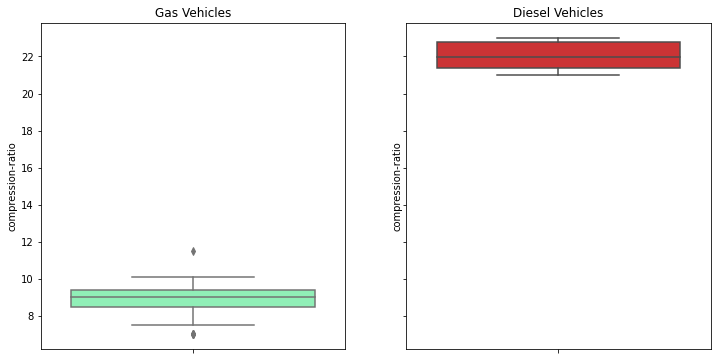

In [20]:
# I am dropping compression ratio because particularly, petrol cars have lesser compression-ratio as 
# compared to diesel cars because of the presence of a spark plug. More on wikipedia and can also be shown here

fig, axs = plt.subplots(1,2, figsize=(12, 6), sharey=True)
axs[0].set_title('Gas Vehicles')
axs[1].set_title('Diesel Vehicles')
sns.boxplot(ax=axs[0], y=dropped_df['compression-ratio'][dropped_df['Fuel']==1], palette='rainbow')
sns.boxplot(ax=axs[1], y=dropped_df['compression-ratio'][dropped_df['Fuel']==0], palette='Set1')

# Because of this high correlation between gas-diesel and compression-ratio we can drop it

In [21]:
dropped_df = df.drop(['engine-size', 'compression-ratio'], axis=1)

In [22]:
# df
(dropped_df[['length', 'width', 'height', 'curb-weight', 'wheel-base']].corr())
# As shown there is a strong positive correlation between wheel-base and length
# As shown there is a strong positive correlation between length and width
# As shown there is a strong positive correlation between length and curb-weight and width

# So length, width, curb-weight and wheel-base share a strong positive correlation and is actually obvious

# Let's drop wheel-base and curb-weight
dropped_df.drop('wheel-base', inplace=True, axis=1)

In [23]:
dropped_df.drop('curb-weight', axis=1, inplace=True)

In [24]:
dropped_df

,Symbol,Norm-Losses,Make,Fuel,aspiration,doors,body-style,drive-wheels,engine-loc,length,width,height,engine-type,no_of_cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,1,0,2,convertible,rwd,True,168.8,64.1,48.8,dohc,4,mpfi,3.47,2.68,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,1,0,2,convertible,rwd,True,168.8,64.1,48.8,dohc,4,mpfi,3.47,2.68,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,1,0,2,hatchback,rwd,True,171.2,65.5,52.4,ohcv,6,mpfi,2.68,3.47,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,1,0,4,sedan,fwd,True,176.6,66.2,54.3,ohc,4,mpfi,3.19,3.40,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,1,0,4,sedan,4wd,True,176.6,66.4,54.3,ohc,5,mpfi,3.19,3.40,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,1,0,4,sedan,rwd,True,188.8,68.9,55.5,ohc,4,mpfi,3.78,3.15,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,1,1,4,sedan,rwd,True,188.8,68.8,55.5,ohc,4,mpfi,3.78,3.15,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,1,0,4,sedan,rwd,True,188.8,68.9,55.5,ohcv,6,mpfi,3.58,2.87,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,0,1,4,sedan,rwd,True,188.8,68.9,55.5,ohc,6,idi,3.01,3.40,106.0,4800.0,26,27,22470.0


In [25]:
cols = ['Symbol', 'Norm-Losses', 'Gas?', 'std?', 'doors', 'body-style', 'drive-wheels', 'front-engine?', 'length', 'width', 'height', 'engine-type', '#cylinders', 'fuel-system', 'bore_stroke_ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [26]:
dropped_df.rename(columns={'bore': 'bore_stroke_ratio'}, inplace=True)

In [27]:
dropped_df['bore_stroke_ratio'] = dropped_df['bore_stroke_ratio']/dropped_df['stroke']

In [28]:
dropped_df.drop('stroke', axis=1, inplace=True)

In [29]:
# fuel_system categorical data
# peak rpm
# mpg
header_names = ['Symbol', 'Norm-Losses', 'Gas?', 'Turbocharger?', 'doors', 'body-style', 'drive-wheels', 'FrontEngine?', 'length', 'width', 'height', 'engine-type', 'no_of_cylinders', 'fuel-system', 'bore_stroke_ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [30]:
mean_norm = dropped_df['Norm-Losses'].mean()
dropped_df['Norm-Losses'].fillna(value=mean_norm, inplace=True)

In [31]:
mean_bsr = dropped_df['bore_stroke_ratio'].mean()
dropped_df['bore_stroke_ratio'].fillna(mean_bsr, inplace=True)

In [32]:
median_hp = dropped_df['horsepower'].median()
dropped_df['horsepower'].fillna(median_hp, inplace=True)

In [33]:
mean_rpm = dropped_df['peak-rpm'].mean()
dropped_df['peak-rpm'].fillna(mean_rpm, inplace=True)

In [34]:
dropped_df.isna().sum()

Symbol               0
Norm-Losses          0
Make                 0
Fuel                 0
aspiration           0
doors                0
body-style           0
drive-wheels         0
engine-loc           0
length               0
width                0
height               0
engine-type          0
no_of_cylinders      0
fuel-system          0
bore_stroke_ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [35]:
# I don't know what to do with make so I am just gonna drop it
dropped_df.drop('Make', axis=1, inplace=True)

In [36]:
dropped_df.columns = header_names

In [37]:
dropped_df["body-style"].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [38]:
dropped_df.shape

(201, 20)

In [39]:
dropped_df.head()

,Symbol,Norm-Losses,Gas?,Turbocharger?,doors,body-style,drive-wheels,FrontEngine?,length,width,height,engine-type,no_of_cylinders,fuel-system,bore_stroke_ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,1,0,2,convertible,rwd,True,168.8,64.1,48.8,dohc,4,mpfi,1.294776,111.0,5000.0,21,27,13495.0
1,3,122.0,1,0,2,convertible,rwd,True,168.8,64.1,48.8,dohc,4,mpfi,1.294776,111.0,5000.0,21,27,16500.0
2,1,122.0,1,0,2,hatchback,rwd,True,171.2,65.5,52.4,ohcv,6,mpfi,0.772334,154.0,5000.0,19,26,16500.0
3,2,164.0,1,0,4,sedan,fwd,True,176.6,66.2,54.3,ohc,4,mpfi,0.938235,102.0,5500.0,24,30,13950.0
4,2,164.0,1,0,4,sedan,4wd,True,176.6,66.4,54.3,ohc,5,mpfi,0.938235,115.0,5500.0,18,22,17450.0


In [40]:
dropped_df['city-mpg'] = (dropped_df['city-mpg'] + dropped_df['highway-mpg'])/2

In [41]:
dropped_df.rename(columns={'city-mpg':'avg-mpg'}, inplace=True)

In [42]:
dropped_df.drop('highway-mpg', axis=1, inplace=True)
dropped_df.head()

,Symbol,Norm-Losses,Gas?,Turbocharger?,doors,body-style,drive-wheels,FrontEngine?,length,width,height,engine-type,no_of_cylinders,fuel-system,bore_stroke_ratio,horsepower,peak-rpm,avg-mpg,price
0,3,122.0,1,0,2,convertible,rwd,True,168.8,64.1,48.8,dohc,4,mpfi,1.294776,111.0,5000.0,24.0,13495.0
1,3,122.0,1,0,2,convertible,rwd,True,168.8,64.1,48.8,dohc,4,mpfi,1.294776,111.0,5000.0,24.0,16500.0
2,1,122.0,1,0,2,hatchback,rwd,True,171.2,65.5,52.4,ohcv,6,mpfi,0.772334,154.0,5000.0,22.5,16500.0
3,2,164.0,1,0,4,sedan,fwd,True,176.6,66.2,54.3,ohc,4,mpfi,0.938235,102.0,5500.0,27.0,13950.0
4,2,164.0,1,0,4,sedan,4wd,True,176.6,66.4,54.3,ohc,5,mpfi,0.938235,115.0,5500.0,20.0,17450.0


In [43]:
dropped_df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [44]:
dropped_df.shape

(201, 19)

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [47]:
dropped_df.head()

,Symbol,Norm-Losses,Gas?,Turbocharger?,doors,body-style,drive-wheels,FrontEngine?,length,width,height,engine-type,no_of_cylinders,fuel-system,bore_stroke_ratio,horsepower,peak-rpm,avg-mpg,price
0,3,122.0,1,0,2,convertible,rwd,True,168.8,64.1,48.8,dohc,4,mpfi,1.294776,111.0,5000.0,24.0,13495.0
1,3,122.0,1,0,2,convertible,rwd,True,168.8,64.1,48.8,dohc,4,mpfi,1.294776,111.0,5000.0,24.0,16500.0
2,1,122.0,1,0,2,hatchback,rwd,True,171.2,65.5,52.4,ohcv,6,mpfi,0.772334,154.0,5000.0,22.5,16500.0
3,2,164.0,1,0,4,sedan,fwd,True,176.6,66.2,54.3,ohc,4,mpfi,0.938235,102.0,5500.0,27.0,13950.0
4,2,164.0,1,0,4,sedan,4wd,True,176.6,66.4,54.3,ohc,5,mpfi,0.938235,115.0,5500.0,20.0,17450.0


In [48]:
dropped_df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [49]:
encoder = OneHotEncoder()

In [50]:
drive_wheels = encoder.fit_transform(df['drive-wheels'].to_numpy().reshape(-1, 1)).toarray()

In [51]:
drive_wheels = drive_wheels[:, 1:]

In [52]:
drive = pd.DataFrame(drive_wheels)
drive.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,0.0


In [53]:
dropped_df.reset_index(inplace=True)

In [54]:
dropped_df = dropped_df.drop(['index'], axis=1)

In [55]:
dropped_df.head()

,Symbol,Norm-Losses,Gas?,Turbocharger?,doors,body-style,drive-wheels,FrontEngine?,length,width,height,engine-type,no_of_cylinders,fuel-system,bore_stroke_ratio,horsepower,peak-rpm,avg-mpg,price
0,3,122.0,1,0,2,convertible,rwd,True,168.8,64.1,48.8,dohc,4,mpfi,1.294776,111.0,5000.0,24.0,13495.0
1,3,122.0,1,0,2,convertible,rwd,True,168.8,64.1,48.8,dohc,4,mpfi,1.294776,111.0,5000.0,24.0,16500.0
2,1,122.0,1,0,2,hatchback,rwd,True,171.2,65.5,52.4,ohcv,6,mpfi,0.772334,154.0,5000.0,22.5,16500.0
3,2,164.0,1,0,4,sedan,fwd,True,176.6,66.2,54.3,ohc,4,mpfi,0.938235,102.0,5500.0,27.0,13950.0
4,2,164.0,1,0,4,sedan,4wd,True,176.6,66.4,54.3,ohc,5,mpfi,0.938235,115.0,5500.0,20.0,17450.0


In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [58]:
drive_wheels = one_hot_encoder.fit_transform(np.array(df['drive-wheels']).reshape(-1, 1))
drive_wheels = drive_wheels[:, 1:]
drive_wheels = pd.DataFrame(drive_wheels)

In [59]:
dropped_df = pd.concat([dropped_df, drive_wheels], axis=1)

In [60]:
dropped_df.head()

,Symbol,Norm-Losses,Gas?,Turbocharger?,doors,body-style,drive-wheels,FrontEngine?,length,width,height,engine-type,no_of_cylinders,fuel-system,bore_stroke_ratio,horsepower,peak-rpm,avg-mpg,price,0,1
0,3,122.0,1,0,2,convertible,rwd,True,168.8,64.1,48.8,dohc,4,mpfi,1.294776,111.0,5000.0,24.0,13495.0,0.0,1.0
1,3,122.0,1,0,2,convertible,rwd,True,168.8,64.1,48.8,dohc,4,mpfi,1.294776,111.0,5000.0,24.0,16500.0,0.0,1.0
2,1,122.0,1,0,2,hatchback,rwd,True,171.2,65.5,52.4,ohcv,6,mpfi,0.772334,154.0,5000.0,22.5,16500.0,0.0,1.0
3,2,164.0,1,0,4,sedan,fwd,True,176.6,66.2,54.3,ohc,4,mpfi,0.938235,102.0,5500.0,27.0,13950.0,1.0,0.0
4,2,164.0,1,0,4,sedan,4wd,True,176.6,66.4,54.3,ohc,5,mpfi,0.938235,115.0,5500.0,20.0,17450.0,0.0,0.0


In [61]:
dropped_df.rename({0:"fwd", 1:"rwd"}, axis=1, inplace=True)

In [62]:
header_names = ['Symbol', 'Norm-Losses', 'Gas?', 'Turbocharger?', 'doors', 'body-style', 'fwd', 'rwd', 'FrontEngine?', 'length', 'width', 'height', 'engine-type', 'no_of_cylinders', 'fuel-system', 'bore_stroke_ratio', 'horsepower', 'peak-rpm', 'avg-mpg', 'price']
dropped_df = dropped_df.reindex(columns=header_names)

In [63]:
dropped_df.head()

,Symbol,Norm-Losses,Gas?,Turbocharger?,doors,body-style,fwd,rwd,FrontEngine?,length,width,height,engine-type,no_of_cylinders,fuel-system,bore_stroke_ratio,horsepower,peak-rpm,avg-mpg,price
0,3,122.0,1,0,2,convertible,0.0,1.0,True,168.8,64.1,48.8,dohc,4,mpfi,1.294776,111.0,5000.0,24.0,13495.0
1,3,122.0,1,0,2,convertible,0.0,1.0,True,168.8,64.1,48.8,dohc,4,mpfi,1.294776,111.0,5000.0,24.0,16500.0
2,1,122.0,1,0,2,hatchback,0.0,1.0,True,171.2,65.5,52.4,ohcv,6,mpfi,0.772334,154.0,5000.0,22.5,16500.0
3,2,164.0,1,0,4,sedan,1.0,0.0,True,176.6,66.2,54.3,ohc,4,mpfi,0.938235,102.0,5500.0,27.0,13950.0
4,2,164.0,1,0,4,sedan,0.0,0.0,True,176.6,66.4,54.3,ohc,5,mpfi,0.938235,115.0,5500.0,20.0,17450.0


In [64]:
dropped_df.drop('fuel-system', axis=1, inplace=True)

In [65]:
dropped_df['body-style'].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [66]:
ohe = OneHotEncoder(sparse=False)

In [67]:
ohe.fit_transform(dropped_df[['body-style']])

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [68]:
X = dropped_df.iloc[:, :-1]
y = dropped_df.iloc[:, -1]
X.shape

(201, 18)

In [69]:
# This is used when you want to apply feature engineering of one type to just a selected number of 
# features in your data set
from sklearn.compose import make_column_transformer

In [70]:
col_trans = make_column_transformer(
    (OneHotEncoder(), ['body-style']),
    remainder='passthrough')

In [71]:
header_names = ['Convertible', 'Hardtop', 'Hatchback', 'Sedan', 'Wagon', 'Symbol', 'Norm-Losses', 'Gas?', 'Turbocharger?', 'doors', 'fwd', 'rwd', 'FrontEngine?', 'length', 'width', 'height', 'engine-type', 'no_of_cylinders', 'bore_stroke_ratio', 'horsepower', 'peak-rpm', 'avg-mpg']
X = pd.DataFrame(col_trans.fit_transform(X), columns=header_names)

In [72]:
X.drop('Wagon', axis=1, inplace=True)

In [73]:
header_names = ['Symbol', 'Norm-Losses', 'Gas?', 'Turbocharger?', 'Convertible', 'Hardtop', 'Hatchback', 'Sedan','doors', 'fwd', 'rwd', 'FrontEngine?', 'length', 'width', 'height', 'engine-type', 'no_of_cylinders', 'bore_stroke_ratio', 'horsepower', 'peak-rpm', 'avg-mpg']
X = X.reindex(columns=header_names)

In [74]:
X.drop('engine-type', axis=1, inplace=True)

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [76]:
ridge_model = Ridge()

In [77]:
model = LinearRegression()

In [78]:
from sklearn.model_selection import KFold

In [79]:
kf = KFold(n_splits=20, shuffle=True)

In [80]:
kf.get_n_splits(X.to_numpy())

20

In [81]:
print(kf)

KFold(n_splits=20, random_state=None, shuffle=True)


In [82]:
ridge_model.alpha = 0.4

scores_lr=[]
scores_ridge = []
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    scores_lr.append(model.score(X_test, y_test))
    ridge_model.fit(X_train, y_train)
    scores_ridge.append(ridge_model.score(X_test, y_test))

In [83]:
print(np.mean(scores_lr))
print(np.mean(scores_ridge))

0.7174312155742018
0.7206155714895355
